In [45]:
import pandas as pd
url = '/content/sample_data/mnist_train_small.csv'
url_test = '/content/sample_data/mnist_test.csv'

df = pd.read_csv(url,  header=None)
test_df = pd.read_csv(url_test,  header=None)

df.head()
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
df.shape

(20000, 785)

In [47]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

y_test = test_df.iloc[:, 0]
X_test = test_df.iloc[:, 1:]

In [48]:
X.shape

(20000, 784)

(784,)


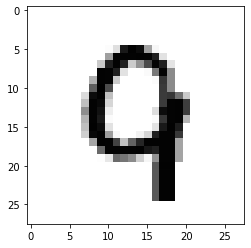

In [49]:
import numpy as np
import matplotlib.pyplot as plt

random_index = np.random.randint(0, X.shape[0])
random_row = X.iloc[random_index, :]

np_random_row = np.array(random_row)


print(np_random_row.shape)

random_im = np_random_row.reshape(28,28)

plt.imshow(random_im, cmap='Greys')
plt.show()

In [50]:
# 1-hot
from keras.utils.np_utils import to_categorical
y = to_categorical(y, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

X = X/255
X_test = X_test/255

In [51]:
X.shape

(20000, 784)

Need X shape (2000, 28, 28, 1)

In [52]:
#conv x to np array
X = np.array(X)
X_test = np.array(X_test)

#reshape X to (rows)
X = X.reshape(X.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [53]:
print(X.shape)
X_test.shape

(20000, 28, 28, 1)


(10000, 28, 28, 1)

## CNN Model


In [54]:
#keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD
from keras.constraints import maxnorm

model = Sequential()

#Conv layer
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1), kernel_constraint=maxnorm(3)))

#Max Pooling layer
model.add(MaxPool2D(2))

model.add(Conv2D(16, kernel_size=2, activation='relu'))

model.add(MaxPool2D(2))

#Flatten layer
model.add(Flatten())

model.add(Dropout(0.2))

#Output Layer
model.add(Dense(10, activation='softmax'))

print(model.summary())

optimizer = Adam(learning_rate=0.001)

early_stopping_monitor = EarlyStopping(patience=10)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X, y, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping_monitor])
model.evaluate(X_test, y_test)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 12, 12, 16)        2064      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 576)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 576)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)              

[0.05681883543729782, 0.9837999939918518]